<a href="https://colab.research.google.com/github/raamiiChu/NCCU_111-1_DCT_Blockchain-Application-Development_Final-Project/blob/main/%E7%A8%8B%E5%BC%8F%E7%A2%BC_%E7%B9%AA%E8%A3%BD%E5%9C%96%E8%A1%A8/%E7%B9%AA%E8%A3%BD%E5%9C%96%E8%A1%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/區塊鍊應用

/content/drive/MyDrive/Colab Notebooks/區塊鍊應用


In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patheffects as pe

from matplotlib.font_manager import fontManager

In [ ]:
style.use('dark_background')

In [ ]:
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

# 指定字體
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

--2023-01-15 02:30:25--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 172.253.122.128, 2607:f8b0:4004:c09::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  44.1MB/s    in 2.6s    

2023-01-15 02:30:27 (44.1 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  
  inflatin

In [ ]:
cal_result = pd.read_excel("計算結果.xlsx", index_col = 0)
cal_result = cal_result.round(1)

## (1 * 2)*50

In [ ]:
def draw_bar(index:int, author_num:int) -> None:
    plt.subplot(1,2,index)
    

    start_index = index*2
    titles = ["Income", "Average Price"]

    types_of_tezos = ["1st sales", "2nd sales"]
    before = cal_result.iloc[author_num][start_index:start_index+2]
    anniversary = cal_result.iloc[author_num+1][start_index:start_index+2]
    after = cal_result.iloc[author_num+2][start_index:start_index+2]

    # 間距
    x = np.arange(len(types_of_tezos))/6
    width = 0.04

    # 畫長條圖
    bar1 = plt.bar(x, before, width, color='#fec8c9', label=cal_result.iloc[author_num].name)
    bar2 = plt.bar(x + width, anniversary, width, color='#fd999a', label=cal_result.iloc[author_num+1].name)
    bar3 = plt.bar(x + 2*width, after, width, color='#87314e', label=cal_result.iloc[author_num+2].name)

    # 加上數字
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height*0.985, f'{height:.1f}', fontsize=12, ha='center', va='bottom')

    # x軸距
    plt.xticks(x + 2*width / 2, types_of_tezos, fontsize=14, fontweight="semibold")
    plt.yticks(fontsize=14, fontweight="semibold")
    plt.ylabel('tezos', fontsize=16, fontweight="semibold")
    plt.title(titles[index-1], fontsize=18, fontweight="bold")

    if index%2 == 0:
        plt.legend(prop = {'size':14}, bbox_to_anchor=(-0.12,-0.4), loc='lower center', fancybox=True, ncol=3)

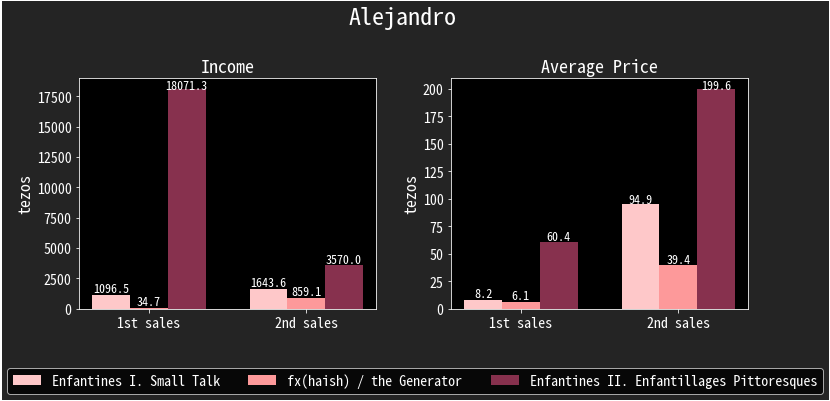

In [ ]:
for i in range(25):
    name = cal_result.iloc[i*3]['author']

    fig  = plt.figure(figsize = (12, 4), facecolor='#242424', edgecolor="white", linewidth=3)
    fig.suptitle(name, fontsize=24, fontweight="black", y=1.15)

    draw_bar(1, i*3)
    draw_bar(2, i*3)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
    plt.savefig(f"./圖表/{name}.png", bbox_inches = "tight", pad_inches = 0.5, facecolor='#242424')
    plt.show()
    plt.close()
    break